In [10]:
# Import libraries
import statistics as stat
import pandas as pd
from scipy import optimize,arange
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt


############ VÆLG LAND (US ELLER UK) ##################
country = "UK"

if country == "US":
    df = pd.read_csv("data/V3_timeseries__postrev_I1Y_19-Oct-2018.csv")
else:
    df = pd.read_csv("data/V3_timeseries__postrev_I1Y_19-Oct-2018-UK.csv", delimiter=";")
#######################################################

#select relevant series, set year as index, create copy
df = df[['year','ProfitK','ProfitY','RF', 'growthpop','priceinvt','PD','growthTFP','ik','EmpPop']]
df = df.set_index('year')
df = df.loc[1984:2016]

#Calculate gap between risk free and return to capital
df["Gap"] = df["ProfitK"] - df["RF"]

df_2 = df.copy()
# Calculate averages and insert to DataFrame
for var in list(df.columns):
    mean1 = stat.mean(df.loc[1984:2000,var])
    mean2 = stat.mean(df.loc[2001:2016,var])
    name1 =str("P1_") + str(var)
    name2 =str("P2_") + str(var)
    df_2[name1] = mean1
    df_2[name2] = mean2
    df_2.loc[1984:2000,name2] = np.nan
    df_2.loc[2001:2016,name1] = np.nan
    
# Make Dictionary for data-series
series = {
    "ProfitK": "Gross profitability",
    "ProfitY": "Capital Share",
    "RF": "Short term real interest rate",
    "growthpop": "Growth in population",
    "priceinvt": "Change in investment prices",
    "PD": "Price-Dividend ratio on stocks",
    "growthTFP": "Growth in Total Factor Productivity",
    "ik":"Ratio of investment to capital",
    "EmpPop": "Share of population employed",
    "Gap": "Gap (Gross profitability to Short term real interest rate)",
}

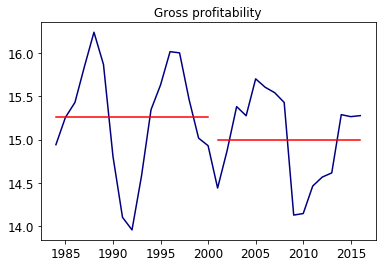

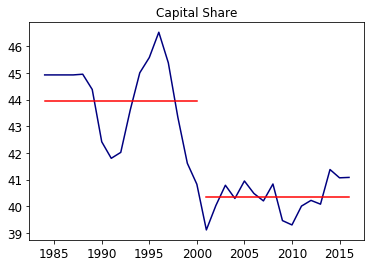

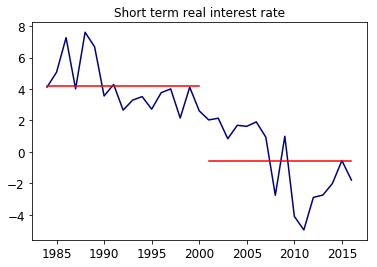

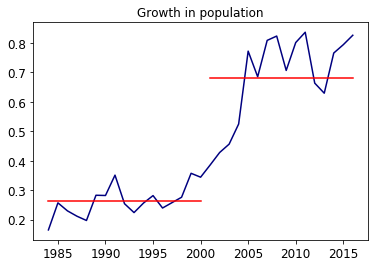

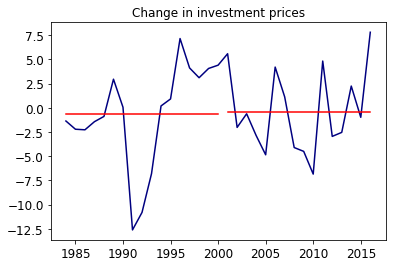

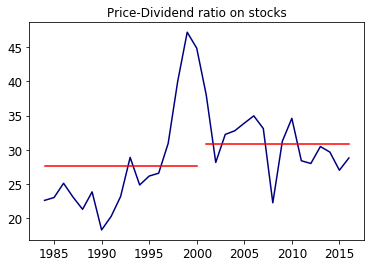

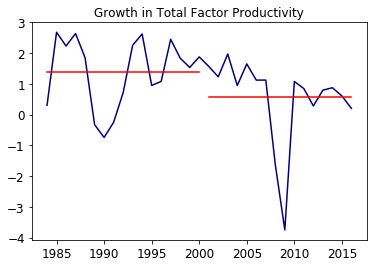

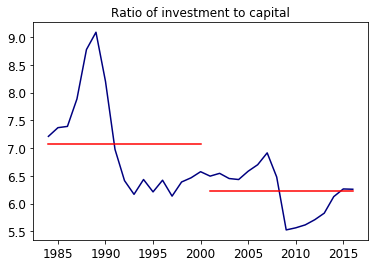

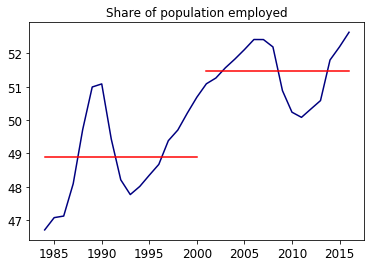

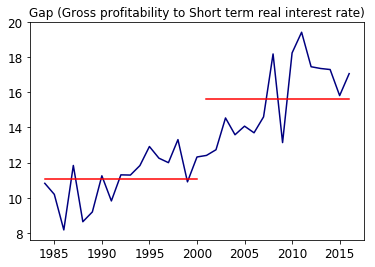

In [14]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

for var in list(df.columns):
    
    #Show plots?
    show = 1
    
    series1 = str(var)
    series2 = str("P1_") + str(var)
    series3 = str("P2_") + str(var)
    
    ax = plt.gca()
    df_2.plot(kind='line',y=series1, color='navy', ax=ax, legend=False, title=series[var])
    df_2.plot(kind='line',y=series2, color='red', ax=ax, legend=False)
    df_2.plot(kind='line',y=series3, color='red', ax=ax, legend=False)
    ax.set_xlabel("")  
    filename = str("graphs/") + str(var) + str(".pdf")
    plt.savefig(filename)
    if show == 1: plt.show()
    plt.close()

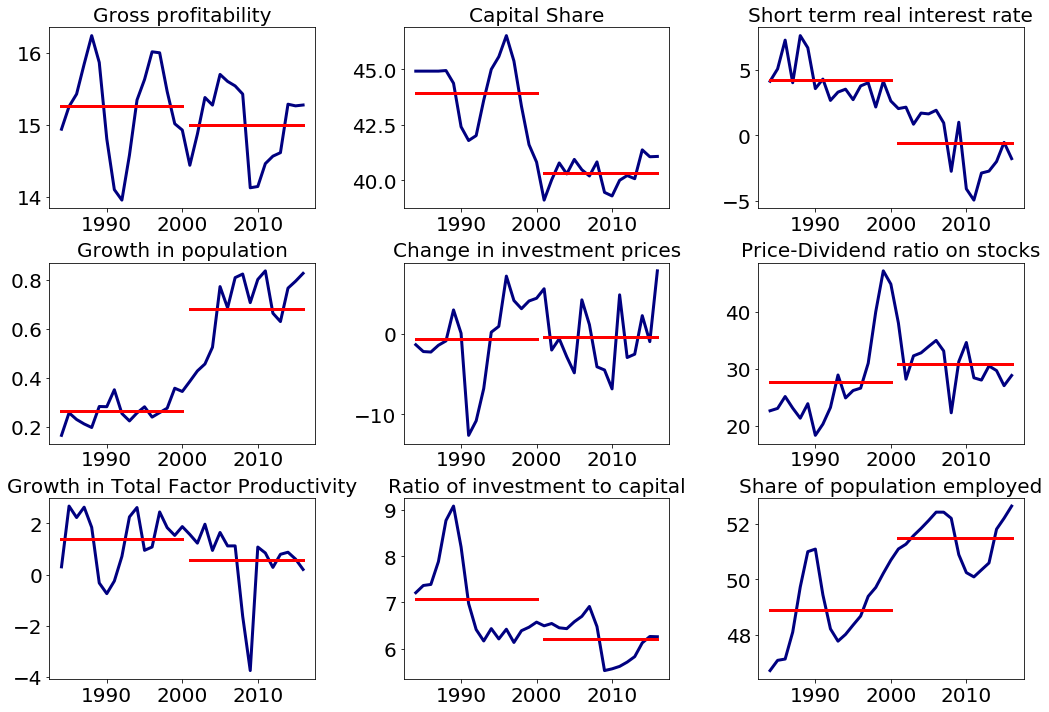

In [13]:

show = 1


plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,10))

for i in range(0,3):
    for j in range(0,3):
        
        graph_id = i*3+j
        var = df.columns[graph_id]
        
        series1 = str(var)
        series2 = str("P1_") + str(var)
        series3 = str("P2_") + str(var)
        
        ax=axes[i,j]
        ax.set_title(series[var], size=20)
        #, title=series[var]
        df_2.plot(kind='line',y=series1, color='navy', ax=ax, legend=False, linewidth=3)
        df_2.plot(kind='line',y=series2, color='red', ax=ax, legend=False, linewidth=3)
        df_2.plot(kind='line',y=series3, color='red', ax=ax, legend=False, linewidth=3)
        ax.set_xlabel("")  

fig.tight_layout()
fig.subplots_adjust(hspace=0.3)
filename = str("graphs/") + str("all") + str(".pdf")
plt.savefig(filename)
if show == 1: plt.show()
plt.close()